In [1]:
import pandas as pd
from currency_to_int import currency_to_number, replace_hyphen_in_columns, extract_minutes, extract_first_category
from currency_to_int import convert_gross_to_numeric

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
box_office = pd.read_csv("box_office.csv")
movies = pd.read_csv("movies.csv")

In [3]:
movies = movies.fillna(0)

In [4]:
movies["runtime"] = movies["runtime"].map(extract_minutes) 

In [5]:
movies = movies.fillna(0)

In [6]:
movies["genre"] = movies["genre"].map(extract_first_category)

In [7]:
for row in movies.itertuples():
    movies.loc[row[0],"gross"] = convert_gross_to_numeric(movies.loc[row[0],"gross"])

In [8]:
movies

,title,audience_rating,genre,critic_rating,runtime,votes,gross,year
0,Gladiador,8.5,Action,67.0,155,1558641,187705427,2000
1,Memento,8.4,Mystery,83.0,113,1284140,25544867,2000
2,Snatch - Porcos E Diamantes,8.2,Comedy,55.0,104,884592,30328156,2000
3,A Vida não é um Sonho,8.3,Drama,71.0,102,872840,3635482,2000
4,Psicopata Americano,7.6,Crime,64.0,102,674017,15070285,2000
...,...,...,...,...,...,...,...,...
45994,Matrimillas,5.5,Comedy,0.0,101,1997,0,2022
45995,From,7.6,Drama,0.0,49,1996,0,2022
45996,Cherasaala,8.7,Crime,0.0,140,1989,0,2022
45997,Vikings: Valhalla,7.4,Action,0.0,46,1989,0,2022


In [9]:
movies = movies.fillna(0)

In [10]:
movies["gross"] = movies["gross"]/1000000

In [11]:
movies["gross"] = movies["gross"].round(2)

In [12]:
movies = movies[(movies["critic_rating"]!=0) & (movies["audience_rating"]!=0)]

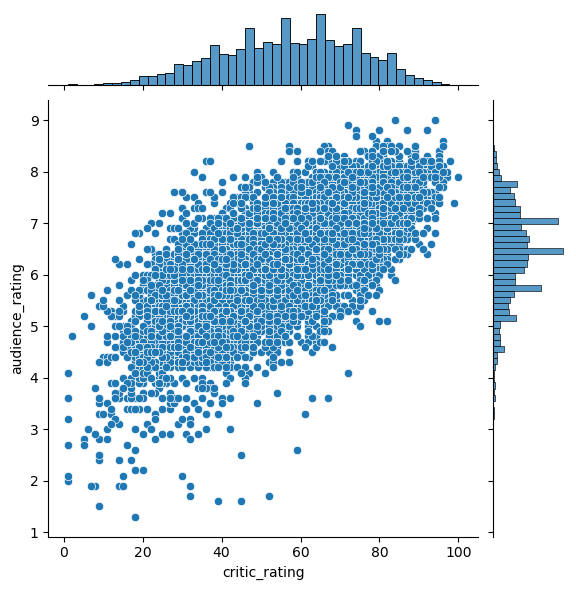

In [13]:
sns.jointplot(data=movies, x='critic_rating', y='audience_rating')

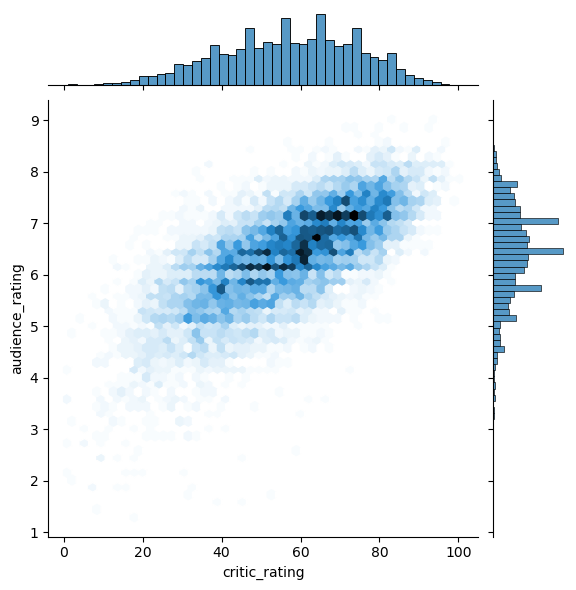

In [14]:
sns.jointplot(data=movies, x='critic_rating', y='audience_rating', kind="hex")

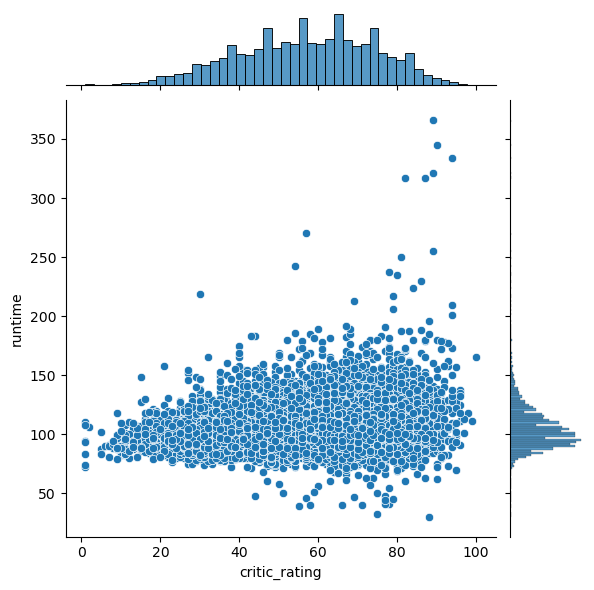

In [15]:
sns.jointplot(data=movies, x='critic_rating', y='runtime')

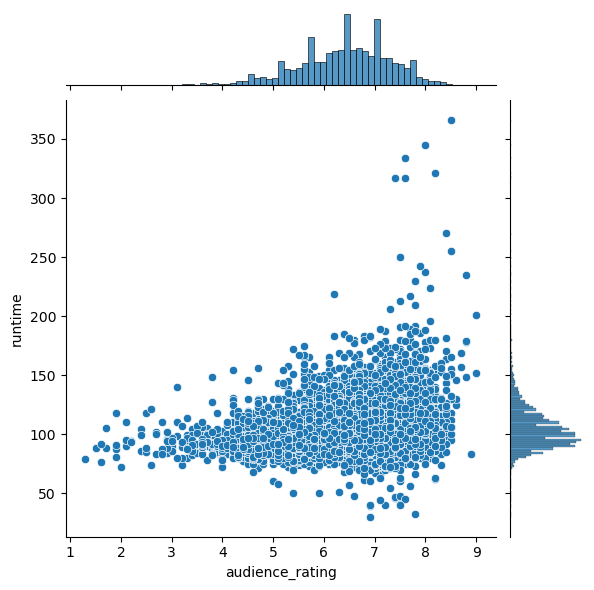

In [16]:
sns.jointplot(data=movies, x='audience_rating', y='runtime')

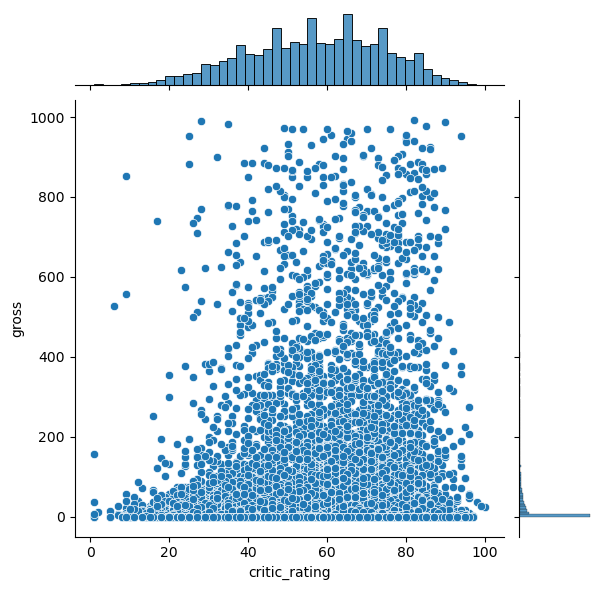

In [17]:
sns.jointplot(data=movies, x='critic_rating', y='gross')

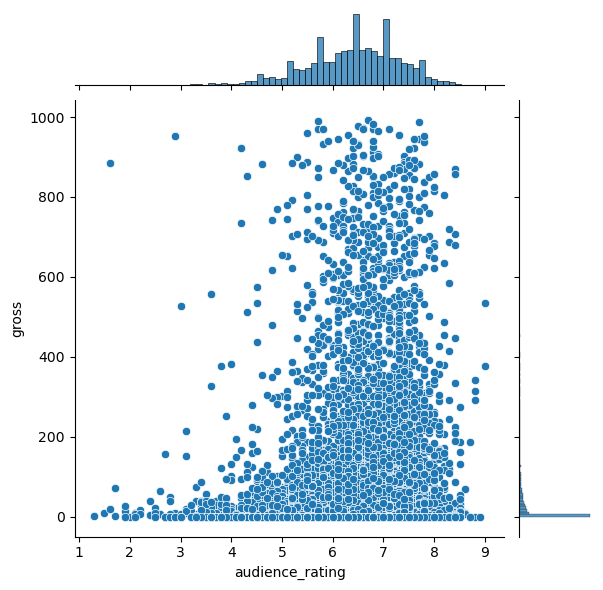

In [18]:
sns.jointplot(data=movies, x='audience_rating', y='gross')

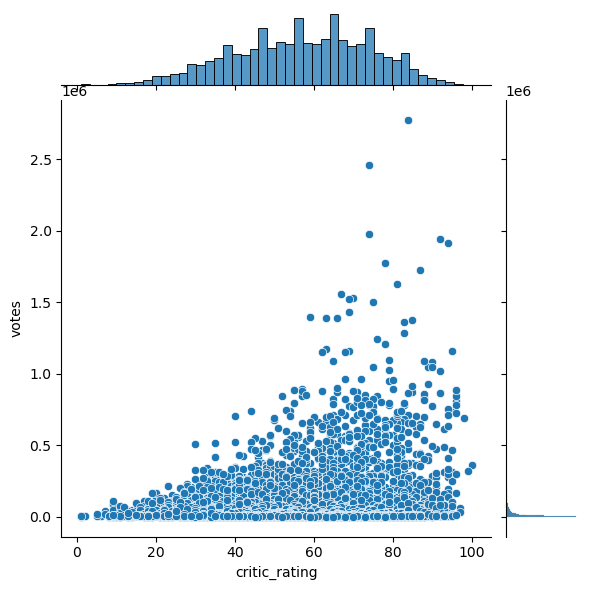

In [19]:
sns.jointplot(data=movies, x='critic_rating', y='votes')

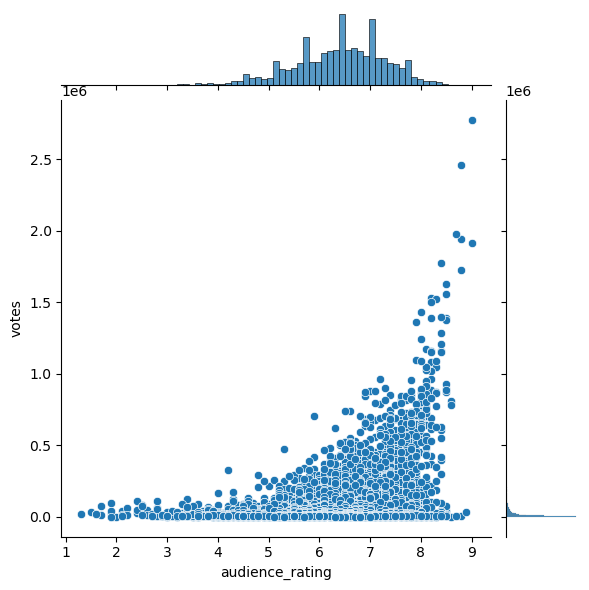

In [20]:
sns.jointplot(data=movies, x='audience_rating', y='votes')